# Chapter 4: Data Parsimony
Figures and exercises for Chapter 4 of [Sustainable AI](https://www.oreilly.com/library/view/sustainable-ai/9781098155506/) by Raghavendra Selvan.

**To run locally without errors, clone the entire repository:** 

``` git clone https://github.com/raghavian/sustainable_ai.git ```

## **Section: Active Learning for Dataset Creation**

Creating labeled datasets by harvesting labels for image analysis can be tedious. The process of labeling data with the primary purpose of using them for training ML models is known as annotation. Open source tools like [Napari](https://napari.org/stable) offer utilities that can be used to build annotation pipelines. Other tools, such as [Rootpainter](https://oreil.ly/tyTG6) for image analysis and [DeepLabCut](https://oreil.ly/Meyq9) for video analysis, enable the rapid training of DL models.

## **Section: Learning with Pruned Datasets**
### **Example 4-1.** Random sampling to assess the trade-off between performance and resource costs
In this version, we measure time but one can also use ```pyJoules``` or ```Carbontracker``` to obtain energy and carbon measurements.

Running 3 trials per sample size
Training dataset size: N= 1


100%|█████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.50it/s]


Training time: 1.9520 +/- 0.0351 s
Test Acc. : 0.2733 +/- 0.0631 

Training dataset size: N= 2


100%|█████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.99it/s]


Training time: 2.4440 +/- 0.3787 s
Test Acc. : 0.2642 +/- 0.0729 

Training dataset size: N= 4


100%|█████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.07it/s]


Training time: 2.7300 +/- 0.0347 s
Test Acc. : 0.3592 +/- 0.1234 

Training dataset size: N= 8


100%|█████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.09it/s]


Training time: 2.7096 +/- 0.0141 s
Test Acc. : 0.2380 +/- 0.0210 

Training dataset size: N= 16


100%|█████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.04it/s]


Training time: 2.7039 +/- 0.0197 s
Test Acc. : 0.3237 +/- 0.0884 

Training dataset size: N= 32


100%|█████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.27it/s]


Training time: 2.9767 +/- 0.2407 s
Test Acc. : 0.3387 +/- 0.0283 

Training dataset size: N= 64


100%|█████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.01it/s]


Training time: 3.2206 +/- 0.2480 s
Test Acc. : 0.3028 +/- 0.0459 

Training dataset size: N= 128


100%|█████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.90it/s]


Training time: 2.7969 +/- 0.1216 s
Test Acc. : 0.4268 +/- 0.0888 

Training dataset size: N= 256


100%|█████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.78it/s]


Training time: 3.0080 +/- 0.2551 s
Test Acc. : 0.4384 +/- 0.1175 

Training dataset size: N= 512


100%|█████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.42it/s]


Training time: 3.1160 +/- 0.1453 s
Test Acc. : 0.5219 +/- 0.0547 

Training dataset size: N= 1024


100%|█████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.36it/s]


Training time: 4.6817 +/- 0.9888 s
Test Acc. : 0.4605 +/- 0.0382 

Training dataset size: N= 2048


100%|█████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.21it/s]


Training time: 4.6427 +/- 0.1498 s
Test Acc. : 0.5896 +/- 0.0302 

Training dataset size: N= 4096


100%|█████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.97it/s]


Training time: 5.8259 +/- 0.3488 s
Test Acc. : 0.5968 +/- 0.0229 

Training dataset size: N= 8192


100%|█████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.23it/s]


Training time: 8.3688 +/- 0.5050 s
Test Acc. : 0.6532 +/- 0.0115 

Training dataset size: N= 16384


100%|█████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.30s/it]


Training time: 13.8953 +/- 0.4634 s
Test Acc. : 0.6775 +/- 0.0058 

Training dataset size: N= 32768


100%|█████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.29s/it]


Training time: 23.7748 +/- 1.1232 s
Test Acc. : 0.6957 +/- 0.0045 



Text(0, 0.5, 'test performance')

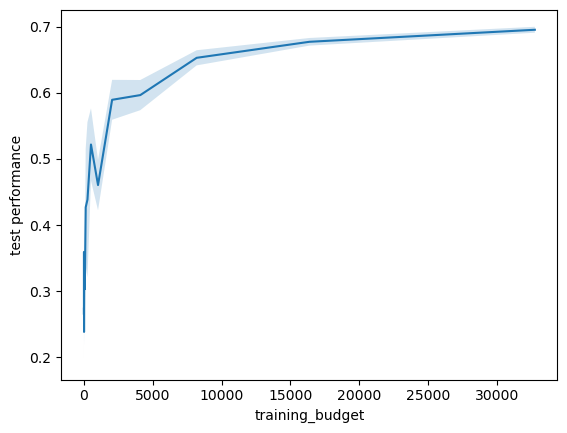

In [6]:
# basic notebook trainer for MLP, ViT, DenseNetSmall on a 40k 10k 10k split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset, random_split
from torch.utils.data._utils.collate import default_collate
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# import your models from models.py
from sustainableai.models import MLP, ViT, DenseNetSmall
from sustainableai.datasets import AerialNIST, collate_float_long, split_40k_10k_10k

# choose your dataset here; it must return (image, label)
ds = AerialNIST()  # example

# settings you probably want to tweak
model_name = "mlp"        # "mlp", "vit", "densenet"
epochs = 10
batch_size = 128
lr = 3e-4
seed = 0
num_workers = 4

def build_model(name: str) -> nn.Module:
    name = name.lower()
    if name == "mlp": return MLP()
    if name == "vit": return ViT()
    if name == "densenet": return DenseNetSmall()
    raise ValueError(f"unknown model {name}")

@torch.no_grad()
def evaluate(model, loader, device):
    model.eval()
    total, correct, loss_sum = 0, 0, 0.0
    crit = nn.CrossEntropyLoss()
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        logits = model(x)
        loss = crit(logits, y)
        loss_sum += loss.item() * y.size(0)
        pred = logits.argmax(dim=1)
        correct += (pred == y.argmax(dim=1)).sum().item()
        total += y.size(0)
    return loss_sum / total, correct / total

def train_model(model_name, ds, epochs=10, batch_size=128, lr=3e-4, seed=0, num_workers=4):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = build_model(model_name).to(device)

    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=0.01)
    crit = nn.CrossEntropyLoss()

    best_state = None
    best_val = float("inf")

    for ep in tqdm(range(1, epochs + 1)):
        model.train()
        run_loss = 0.0
        
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            opt.zero_grad(set_to_none=True)
            logits = model(x)
            loss = crit(logits, y)
            loss.backward()
            opt.step()
            run_loss += loss.item() * y.size(0)

        train_loss = run_loss / len(train_loader.dataset)
        val_loss, val_acc = evaluate(model, val_loader, device)
        #print(f"epoch {ep:02d}  train {train_loss:.4f}  val {val_loss:.4f}  acc {val_acc:.3%}")

        if val_loss < best_val:
            best_val = val_loss
            best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}

    if best_state is not None:
        model.load_state_dict(best_state)
    test_loss, test_acc = evaluate(model, test_loader, device)
    #print(f"test  loss {test_loss:.4f}  acc {test_acc:.3%}")
    return model, test_acc

### Different random sampling budget
train_ds, val_ds, test_ds = split_40k_10k_10k(ds, seed)
sample_sizes = [1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384,32768]

val_loader   = DataLoader(val_ds, shuffle=False,batch_size=batch_size)
test_loader  = DataLoader(test_ds, shuffle=False,batch_size=batch_size)
train_time_mean = []
train_time_std = []
all_test_mean = []
all_test_std = []
num_trials = 3
print('Running %d trials per sample size'%num_trials)
for sample_size in sample_sizes:
    loc_time = []
    loc_test_acc = []
    print('Training dataset size: N= %d'%(sample_size))
    for t in range(num_trials):
        idx = torch.randperm(len(train_ds)).tolist()[:sample_size]
        train_loader = DataLoader(Subset(train_ds,idx), shuffle=True,batch_size=batch_size)
        # run training after you set ds
        start_time = time.time()
        trained, test_acc = train_model(model_name, ds, epochs=epochs, batch_size=batch_size, lr=lr, seed=seed, num_workers=num_workers)
        loc_test_acc.append(test_acc)
        loc_time.append(time.time()-start_time)
    train_time_mean.append(np.mean(loc_time))
    train_time_std.append(np.std(loc_time))
    all_test_mean.append(np.mean(loc_test_acc))
    all_test_std.append(np.std(loc_test_acc))
    print('Training time: %.4f +/- %.4f s'%(train_time_mean[-1],train_time_std[-1]))
    print('Test Acc. : %.4f +/- %.4f \n'%(all_test_mean[-1],all_test_std[-1]))


Text(0, 0.5, 'training time')

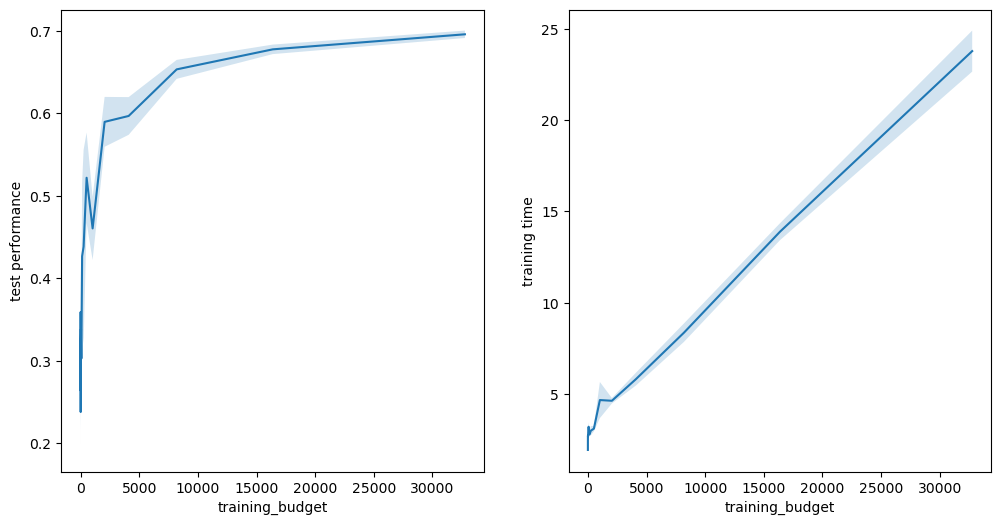

### **Figure 4-8.** K-means clustering and K-center selection for instance selection.

/home/raghav/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


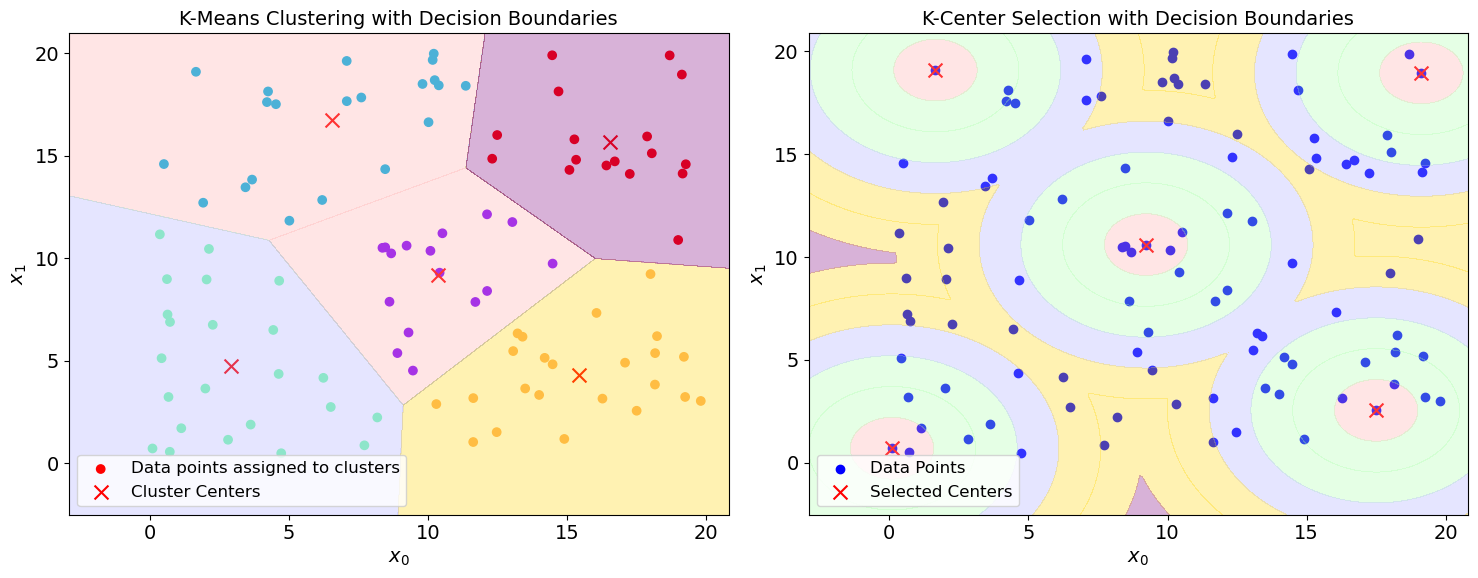

In [1]:
import itertools
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import matplotlib

params = {'font.size': 14,
          'axes.labelsize':14,
          'axes.titlesize':14,
          'legend.fontsize': 12,
         }
matplotlib.rcParams.update(params)

def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def min_distance_to_centers(point, centers):
    return min([euclidean_distance(point, center) for center in centers])

def k_center_selection(points, k):
    selected_centers = [points[0]]  # Start with the first point as a center

    while len(selected_centers) < k:
        max_min_distance = -1
        new_center = None

        for point in points:
            if point not in selected_centers:
                min_distance = min_distance_to_centers(point, selected_centers)
                if min_distance > max_min_distance:
                    max_min_distance = min_distance
                    new_center = point

        selected_centers.append(new_center)

    return selected_centers

# Generate 100 random points in 2D space
random.seed(2)  # Set a seed for reproducibility
points = [(random.uniform(0, 20), random.uniform(0, 20)) for _ in range(100)]

# Number of clusters for k-means and k-center selection
k_clusters = 5
k_centers = 5

# Perform k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=42)
kmeans.fit(points)
cluster_centers = kmeans.cluster_centers_

# Perform k-center selection
selected_centers = k_center_selection(points, k_centers)

def plot_decision_boundaries(points, centers, ax):
    h = 0.1
    x_min, x_max = min(p[0] for p in points) - 3, max(p[0] for p in points) + 1
    y_min, y_max = min(p[1] for p in points) - 3, max(p[1] for p in points) + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.array([min_distance_to_centers((x, y), centers) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700', '#800080'])
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot k-center selection with decision boundaries
axes[1].scatter(*zip(*points), label='Data Points', color='blue')
axes[1].scatter(*zip(*selected_centers), label='Selected Centers', color='red', marker='x', s=100)
plot_decision_boundaries(points, selected_centers, axes[1])
axes[1].set_xlabel('$x_0$')
axes[1].set_ylabel('$x_1$')
axes[1].set_title('K-Center Selection with Decision Boundaries')
axes[1].legend(loc='lower left')

# Plot k-means clustering with decision boundaries
axes[0].scatter(*zip(*points), c=kmeans.labels_, cmap='rainbow', label='Data points assigned to clusters')
axes[0].scatter(*zip(*cluster_centers), label='Cluster Centers', color='red', marker='x', s=100)

# Create meshgrid for decision boundaries in k-means
h = 0.01
x_min, x_max = min(p[0] for p in points) - 3, max(p[0] for p in points) + 1
y_min, y_max = min(p[1] for p in points) - 3, max(p[1] for p in points) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700', '#800080'])
axes[0].contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)

axes[0].set_xlabel('$x_0$')
axes[0].set_ylabel('$x_1$')
axes[0].set_title('K-Means Clustering with Decision Boundaries')
axes[0].legend(loc='lower left')
plt.tight_layout()

### **Example 4-2.** Effect on the number of tokens generated from the FAIRYTALES dataset when using word-level, character-level, and subword tokenization schemes

#### Install transformers package to access different tokenizers

In [ ]:
### Install nltk package to access different tokenizers
!pip install nltk

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import argparse

def char_tokenize(text):
    return list(text)

def simple_subword_tokenize(text, subword_vocab):
    tokens = []
    for word in text.split():
        if word in subword_vocab:
            tokens.append(word)
        else:
            start = 0
            while start < len(word):
                for end in range(len(word), start, -1):
                    subword = word[start:end]
                    if subword in subword_vocab:
                        tokens.append(subword)
                        start = end
                        break
                if start < len(word):
                    tokens.append(word[start])
                    start += 1
    return tokens

def analyze_tokenization(text):
    # Word tokenization
    word_tokens = word_tokenize(text)
    word_vocab = set(word_tokens)
    
    # Character tokenization
    char_tokens = char_tokenize(text)
    char_vocab = set(char_tokens)
    
    # Subword tokenization
    # This is a simple subword vocabulary for demonstration
    subword_vocab = set(['un', 'ing', 'ed', 'er', 'est', 'ly', 'tion', 'al', 'ive', 'ize', 'ous', 'ism', 'able', 'ment'])
    subword_tokens = simple_subword_tokenize(text, subword_vocab)
    subword_vocab = set(subword_tokens)
    
    print(f"Original text length: {len(text)} characters")
    print("\nWord Tokenization:")
    print(f"Number of tokens: {len(word_tokens)}")
    print(f"Vocabulary size: {len(word_vocab)}")
    print(f"Top 10 most common tokens: {Counter(word_tokens).most_common(10)}")
    
    print("\nCharacter Tokenization:")
    print(f"Number of tokens: {len(char_tokens)}")
    print(f"Vocabulary size: {len(char_vocab)}")
    print(f"Top 10 most common tokens: {Counter(char_tokens).most_common(10)}")
    
    print("\nSimple Subword Tokenization:")
    print(f"Number of tokens: {len(subword_tokens)}")
    print(f"Vocabulary size: {len(subword_vocab)}")
    print(f"Top 10 most common tokens: {Counter(subword_tokens).most_common(10)}")

with open('../data/fairytales.txt', 'r', encoding='utf-8') as file:
    text = file.read()
analyze_tokenization(text)



Original text length: 381462 characters

Word Tokenization:
Number of tokens: 83132
Vocabulary size: 6420
Top 10 most common tokens: [(',', 5510), ('the', 4980), ('and', 2702), ('.', 2126), ('to', 1474), ('’', 1462), ('of', 1386), ('a', 1221), (';', 1125), ('‘', 1080)]

Character Tokenization:
Number of tokens: 381462
Vocabulary size: 75
Top 10 most common tokens: [(' ', 64371), ('e', 40048), ('t', 26821), ('h', 22631), ('a', 22121), ('o', 20921), ('n', 18739), ('s', 18532), ('r', 17594), ('i', 16781)]

Simple Subword Tokenization:
Number of tokens: 291153
Vocabulary size: 87
Top 10 most common tokens: [('e', 30339), ('t', 26223), ('h', 22631), ('o', 20600), ('a', 20504), ('s', 17955), ('n', 15659), ('i', 14549), ('r', 11751), ('d', 11019)]


## **Section: Learning with Compressed Data**
### **Figure 4-9.** Visualizing the dimensionality reduction for a toy dataset in 3D to 2D using random projection and PCA.

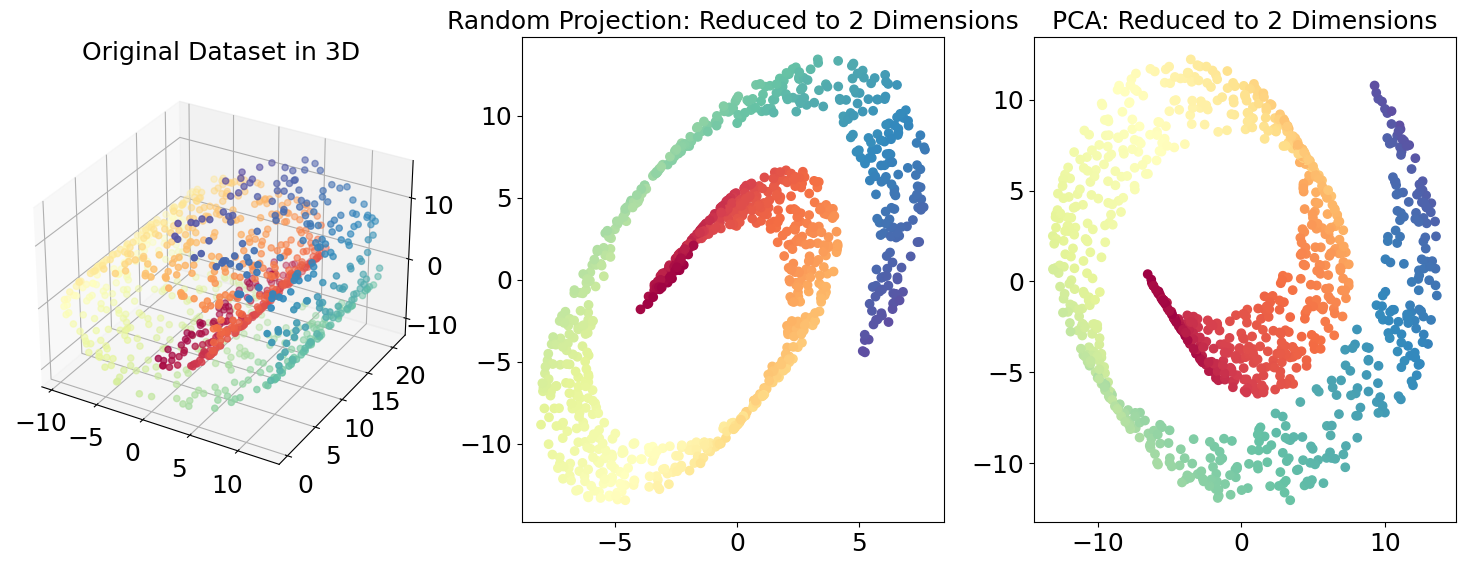

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
import matplotlib

params = {'font.size': 18,
          'axes.labelsize':18,
          'axes.titlesize':18,
          'legend.fontsize': 18,
         }
matplotlib.rcParams.update(params)


# Generate synthetic data (Swiss Roll dataset)
n_samples = 1000
X, color = make_swiss_roll(n_samples=n_samples, random_state=42)

# Original dimensionality
original_dim = X.shape[1]

# Perform PCA for comparison
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform random projection
target_dim = 2
random_projection = GaussianRandomProjection(n_components=target_dim, random_state=42)
X_rp = random_projection.fit_transform(X)

# Create a figure with subplots
plt.figure(figsize=(15, 6))

# 3D Visualization of the original dataset (subplot 1)
ax1 = plt.subplot(1, 3, 1, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax1.set_title('Original Dataset in 3D')

# PCA plot (subplot 2)
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title('PCA: Reduced to 2 Dimensions')

# Random Projection plot (subplot 3)
plt.subplot(1, 3, 2)
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title('Random Projection: Reduced to 2 Dimensions')

plt.tight_layout()

### Autoencoders for learning low-dimensional representations of AerialNIST 
<div>
<img src="../figures/suai_0410.png" width="600"/>
</div>

* Changing the latent dimension, complexity of encoder-decoder networks can yield better reconstructions
* Training the model further can also result in better clustered latent space
* The run below is to showcase a simple MLP-base autoencoder; so the reconstructions look particularly poor.

Epoch [1/20], Loss: 0.0064
Epoch [2/20], Loss: 0.0066
Epoch [3/20], Loss: 0.0054
Epoch [4/20], Loss: 0.0057
Epoch [5/20], Loss: 0.0070
Epoch [6/20], Loss: 0.0069
Epoch [7/20], Loss: 0.0047
Epoch [8/20], Loss: 0.0043
Epoch [9/20], Loss: 0.0046
Epoch [10/20], Loss: 0.0051
Epoch [11/20], Loss: 0.0059
Epoch [12/20], Loss: 0.0049
Epoch [13/20], Loss: 0.0061
Epoch [14/20], Loss: 0.0044
Epoch [15/20], Loss: 0.0054
Epoch [16/20], Loss: 0.0052
Epoch [17/20], Loss: 0.0055
Epoch [18/20], Loss: 0.0056
Epoch [19/20], Loss: 0.0060
Epoch [20/20], Loss: 0.0061


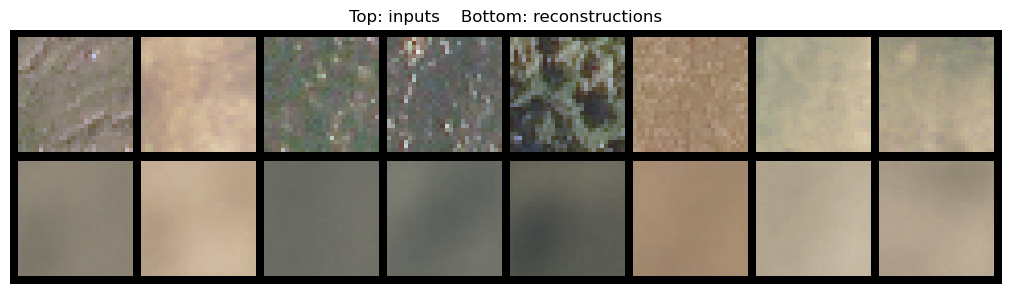

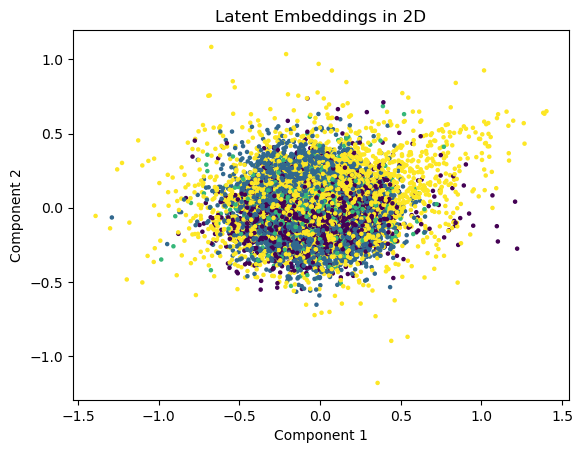

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sustainableai.datasets import AerialNIST
from sustainableai.models import Autoencoder
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from sklearn.decomposition import PCA

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
latent_dim = 32
hidden = 128
learning_rate = 0.001
num_epochs = 20
batch_size = 64

# Create custom dataset
dataset = AerialNIST()  # Same size as MNIST

# Create data loader
data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

# Create autoencoder model
model = Autoencoder(latent_dim,hidden)
model = model.to(device)
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for batch_data,_ in data_loader:
        batch_data = batch_data.to(device)
        batch_data = batch_data.view(-1, 3*28*28)
        optimizer.zero_grad()
        _, outputs = model(batch_data)
        loss = criterion(outputs, batch_data)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Visualize original and reconstructed data
model.eval()

with torch.inference_mode():
    x, _ = next(iter(data_loader))                 # x: [B, 3, 28, 28] or [B, ...]
    x = x.to(device).float()
    if x.max() > 1.0:                              # if you stored 0..255
        x = x / 255.0

    B = min(8, x.size(0))                          # show up to 8 examples
    x = x[:B]

    x_flat = x.view(B, -1)                         # your model expects flattened input
    _, x_hat = model(x_flat)                       # tuple: (latent, recon)
    x_hat = x_hat.view(B, 3, 28, 28).clamp(0, 1)   # reshape and clip for display

    # stack originals then reconstructions so make_grid makes two rows
    comp = torch.cat([x, x_hat], dim=0)            # [2B, 3, 28, 28]
    grid = make_grid(comp.cpu(), nrow=B, padding=2)

plt.figure(figsize=(1.6 * B, 3.6))
plt.imshow(grid.permute(1, 2, 0))
plt.axis("off")
plt.title("Top: inputs    Bottom: reconstructions")
plt.show()

# Get latent embeddings
encoded_data = []
labels = []
with torch.no_grad():
    for batch_data,batch_labels in data_loader:
        batch_data = batch_data.view(-1, 3*28*28)
        encoded_batch, _ = model(batch_data)
        encoded_data.append(encoded_batch)
        labels.append(batch_labels)
embeddings  = torch.cat(encoded_data, dim=0)
labels = torch.cat(labels, dim=0)
labels = labels.argmax(dim=1)
# Apply dimensionality reduction using t-SNE or PCA
# tsne_embeddings = TSNE(n_components=2).fit_transform(encoded_data.numpy())
if latent_dim > 2:
    pca_embeddings = PCA(n_components=2).fit_transform(embeddings.numpy())

# Plot the embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1], s=5,c=labels)
plt.title('Latent Embeddings in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

## **Dataset Condensation**

<div>
<img src="../figures/suai_0411.png" width="600"/>
</div>

I encourage readers to check out the official implementation of Distribution Matching from the authors on their github repository, if interested in trying out some dataset condensation methods. It is accessible [here](https://github.com/VICO-UoE/DatasetCondensation).